# Introduction to Segmentation

In this exercise we will look at different segmentation algorithms.

##  Clustering

One of the basic unsupervised learning approaches is clustering, where the algorithm has to find out which part of the data belongs together in one cluster. 

For segmentation, this data is taken from the pixel values, possible from a neighborhood of the pixels and often by calculating specific features in this region. However, for the moment we will use the raw (color) data of the pixels and possibly also the location and look at features later.

In [2]:
import numpy as np
import skimage
import skimage.data
import skimage.io
import skimage.future
import skimage.segmentation
import sklearn.cluster

# for displaying images in jupyter
from matplotlib import pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]
#mpl.rcParams['figure.dpi']= 400




## Exercise 1: Using KMeans for background subtraction on a medical image

In the first exercise, we want to extract the background from an image showning the hands on green background. The image is a sample from out project to detect eczema, however we will only be concerned about finding the background and the hands.

<img src=./images/hand_green_small.png width=400px>

This could also be achieved by defining a suitable range of color for either the background or the foreground and use thresholding. We want to find out, if it is also possible using k-Means.

Use kmeans for clustering all the pixels in the image into 2 clusters using only the RGB values.

If we use the raw pixels, the position of the pixels do not matter. You will have to reshape the image into a 1D Array of RGB values and convert them to float.

There are different implementations of kmeans available, most noteworthy an opencv and a sklearn implementation. 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


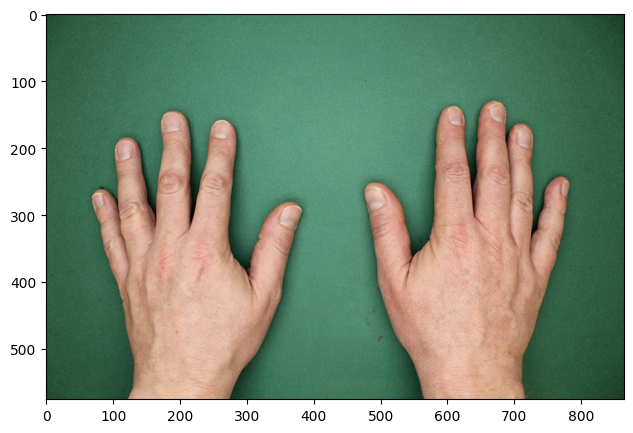

In [3]:
image = skimage.io.imread('images/hand_green_small.png')
plt.imshow(image)

(576, 864, 3)
(497664, 3)
(497664,)


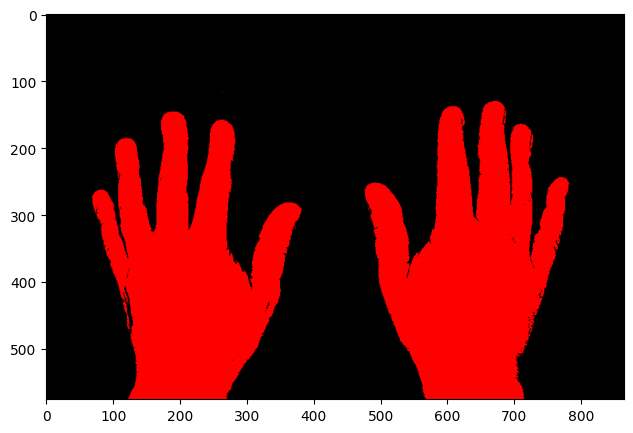

In [4]:
# Use k-means to find 2 clusters and display them
# For displaying you can use either the found cluster centers as colors or overlay the labels, see skimage.color.label2rgb

print(image.shape)
data = image.reshape((-1, 3)).astype(np.float32)
print(data.shape)
kmeans = sklearn.cluster.KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
print(labels.shape)
plt.imshow(skimage.color.label2rgb(labels.reshape(image.shape[:2])))


### Further questions

How can you find out, if the segmentation was good or not?

In [5]:
# Calculate the distance of the pixels to the cluster centers
distances = np.linalg.norm(data - kmeans.cluster_centers_[labels], axis=1)
# Calculate the mean distance for each cluster
print(np.mean(distances[labels == 0]))
print(np.mean(distances[labels == 1]))

35.734394
32.138786


## Exercise 2: K-Means with multiple labels.

Try the K-Means Algorithmus on the following image to seperate the different colored figures and the gray and black background.

<img src=./images/carcassonne_figures.jpg width=400px>

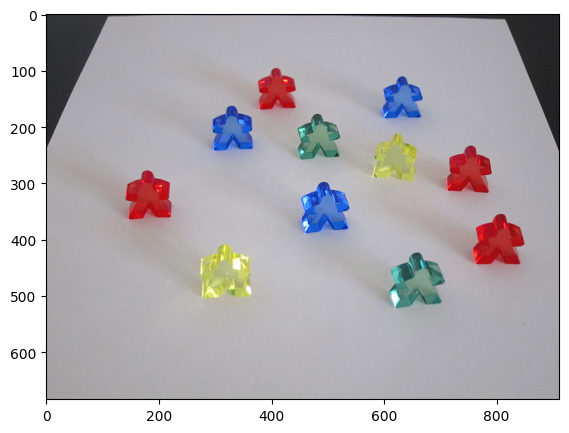

In [6]:
image = skimage.io.imread('images/carcassonne_figures.jpg')
data = image.reshape((-1, 3)).astype(np.float32)
plt.imshow(image)

(623808,)


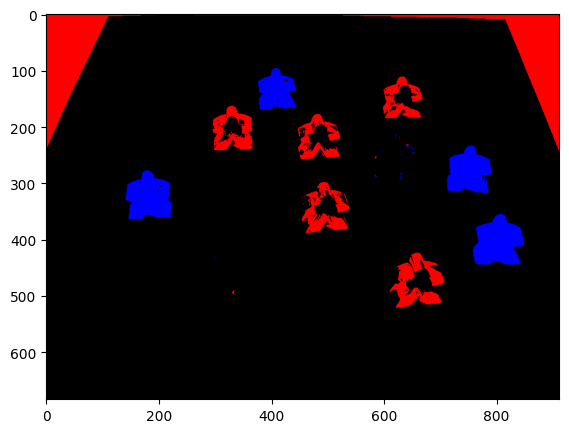

In [7]:
data = image.reshape((-1, 3)).astype(np.float32)
kmeans = sklearn.cluster.KMeans(n_clusters=3)
kmeans.fit(data)
labels = kmeans.predict(data)
print(labels.shape)
plt.imshow(skimage.color.label2rgb(labels.reshape(image.shape[:2])))

### Further questions

Try different values for the number of clusters. What results do you get?

One for the problems is that similar colors with different intensity will end up in different clusters. How could you solve that issue?

(623808,)


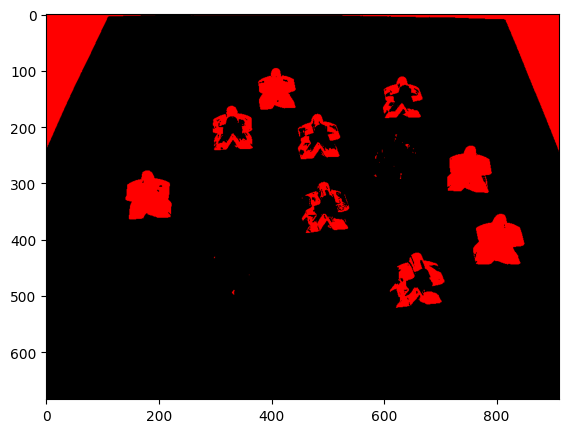

(623808,)


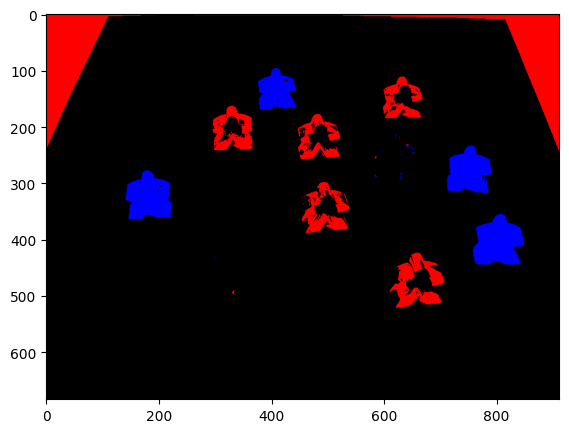

(623808,)


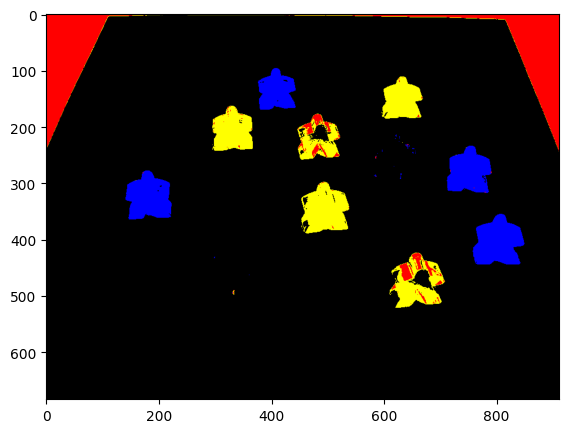

(623808,)


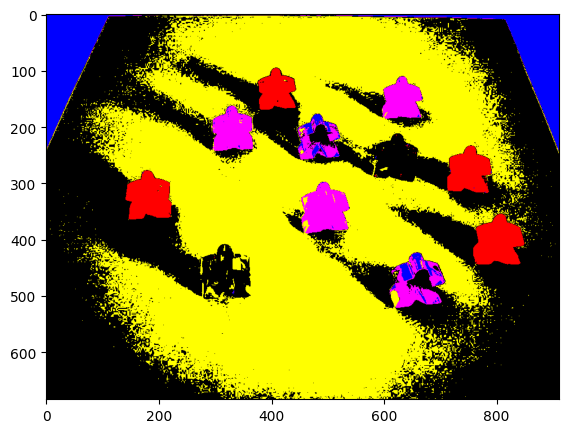

In [8]:
for n_clusters in range(2, 6):
    kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    labels = kmeans.predict(data)
    print(labels.shape)
    plt.imshow(skimage.color.label2rgb(labels.reshape(image.shape[:2])))
    plt.show()

(623808,)


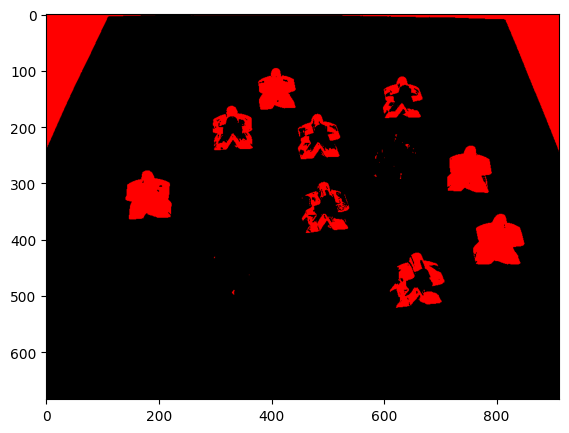

(623808,)


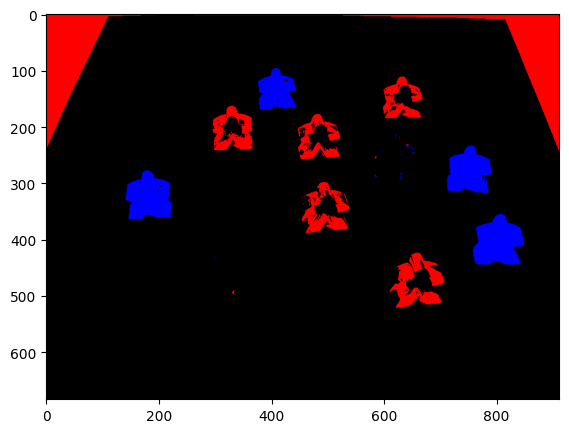

(623808,)


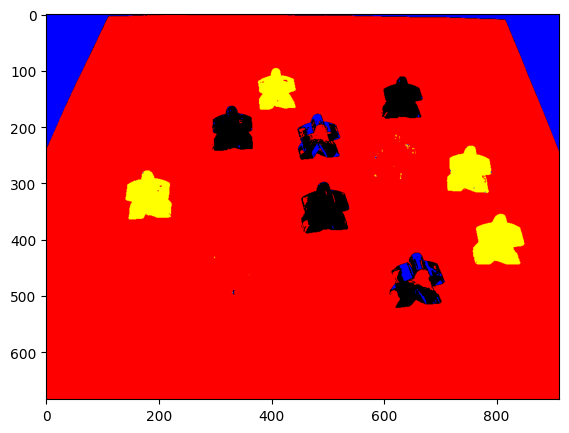

(623808,)


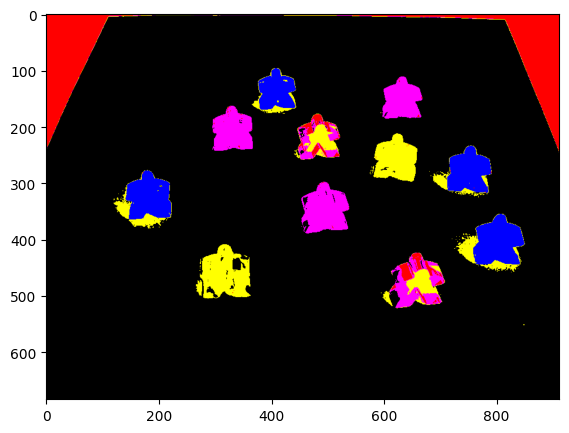

In [9]:
for n_clusters in range(2, 6):
    kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters)
    data = data / 100
    kmeans.fit(data)
    labels = kmeans.predict(data)
    print(labels.shape)
    plt.imshow(skimage.color.label2rgb(labels.reshape(image.shape[:2])))
    plt.show()

## Exercise 3: Different segmentations for autonoumous vehicels.  

We want to try out different segmentation algorithms on a more difficult image from a dataset for semantic segmentation for autonomous vehicles:

<img src=./images/000041_10.png width=400px>

### Exercise 3.1. k-Means

Try K-Means on this data set.

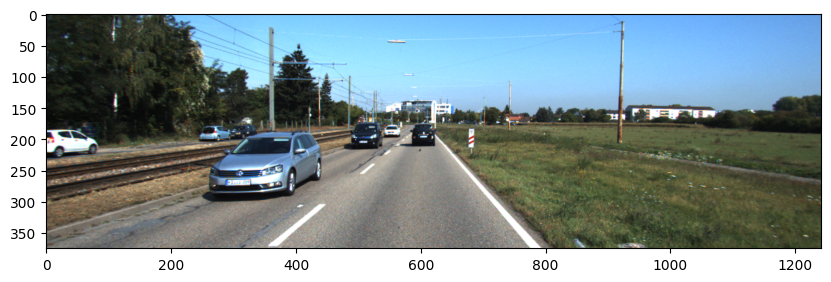

In [10]:
image = skimage.io.imread('images/000041_10.png')
data = image.reshape((-1, 3)).astype(np.float32)
plt.imshow(image)

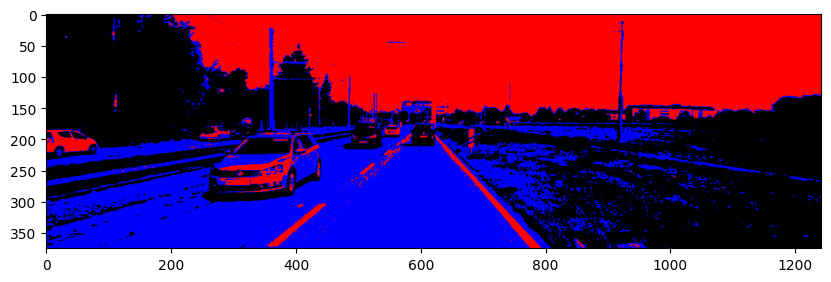

In [11]:
kmeans = sklearn.cluster.KMeans(n_clusters=3)
kmeans.fit(data)
labels = kmeans.predict(data)
plt.imshow(skimage.color.label2rgb(labels.reshape(image.shape[:2])))

### Exercise 3.2: Superpixel segmentation

The skimage library has methods that directly segment the images into clusters using both the pixel coordinates and the color. Such methods are often used as a preliminary processing step of clustering an image into so called superpixel which can then be input into a further, often graph based, segmentation algorithm.

Try this segmentation using 
http://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.slic



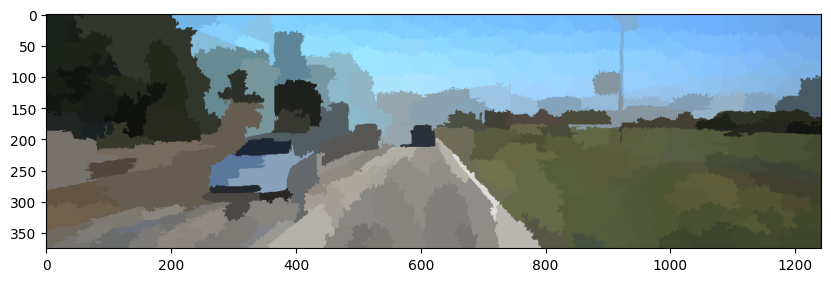

In [12]:
clusters = skimage.segmentation.slic(image, n_segments=500, compactness=5)  # Adjust compactness
plt.imshow(skimage.color.label2rgb(clusters, image, kind='avg'))

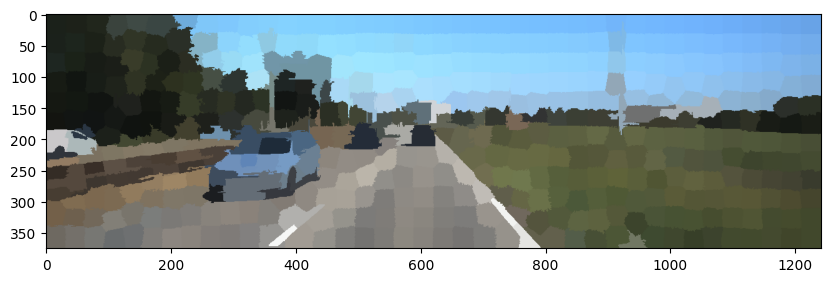

In [13]:
clusters = skimage.segmentation.slic(image, n_segments=500, compactness=30)
plt.imshow(skimage.color.label2rgb(clusters, image, kind='avg'))

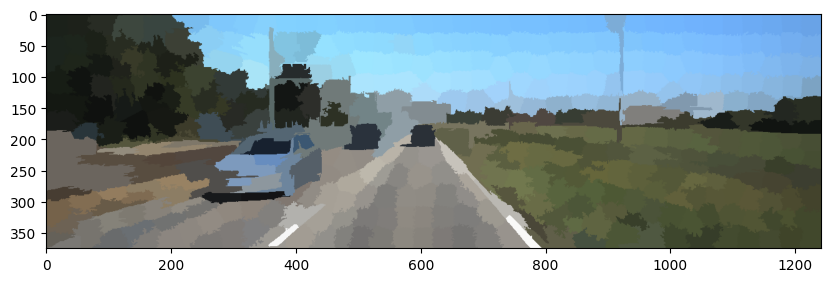

In [14]:
clusters = skimage.segmentation.slic(image, n_segments=500, sigma=0.5)  # Reduce smoothing
plt.imshow(skimage.color.label2rgb(clusters, image, kind='avg'))

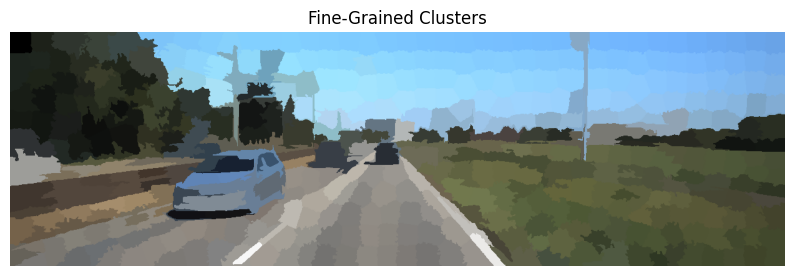

In [177]:
# Apply SLIC with fine-granular settings
labels = skimage.segmentation.slic(image, n_segments=500, compactness=10, sigma=1, start_label=0)

# Visualize the clusters
plt.figure(figsize=(10, 10))
plt.imshow(skimage.color.label2rgb(labels, image, kind='avg'))  # Show clusters with average color
plt.title("Fine-Grained Clusters")
plt.axis("off")
plt.show()

In [168]:
len(np.unique(labels))

408

### Exercise 3.3: GraphCut

The skimage packages contains a graph cut algorithms to segment a (superpixel) image using the graph cut algorithms.

To use is, first the *Region Adjacency Graph* of the segmented superpixels must be constructed:

http://scikit-image.org/docs/dev/api/skimage.graph.html#skimage.graph.rag_mean_color


and then the graph cut algorithms can be applied:

https://scikit-image.org/docs/stable/api/skimage.graph.html#skimage.graph.cut_normalized

Use both methods to segment the result of the superpixel segmentation using graph cuts and display the result.


In [15]:
labels = skimage.segmentation.slic(image, n_segments=500, compactness=10, sigma=1, start_label=0
                                   )

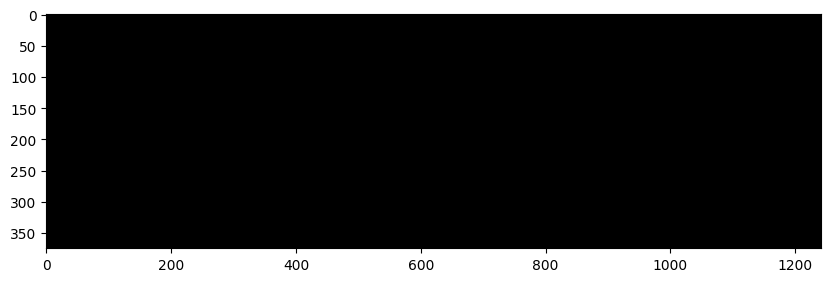

In [20]:
rag = skimage.graph.rag_mean_color(image, labels)
new_labels = skimage.graph.cut_normalized(labels, rag)
plt.imshow(skimage.color.label2rgb(new_labels, image, kind='avg'))

In [21]:
print("Number of nodes in RAG:", len(rag.nodes))
print("Number of edges in RAG:", len(rag.edges))

Number of nodes in RAG: 408
Number of edges in RAG: 1539


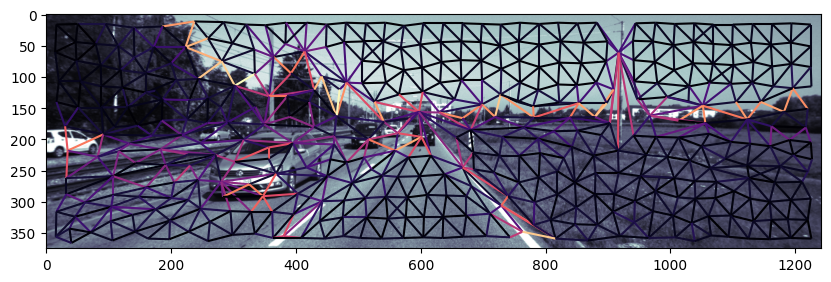

In [19]:
skimage.graph.show_rag(labels, rag, image, border_color=None)

### Exercise 3.4: Mean Shift Segmentation

As the next exercise, we would like to solve the same clustering using mean shift. There is an implementation in sklearn:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

Mean shift is quite a slow algorithm...

The mean shift algorithms will first evaluate the kernel to be used. This can be done seperately to have more control over values.



In [22]:
bandwidth = sklearn.cluster.estimate_bandwidth(data, quantile=0.2, n_samples=5000)
print(bandwidth)

51.324957717082555


Now create a meanshift object, fit the data and display the result again.

In [23]:
model = sklearn.cluster.MeanShift(bandwidth=bandwidth, n_jobs=4, max_iter=30)
model.fit(data)
center_colors = np.uint8(model.cluster_centers_)
labels_image = model.labels_.reshape((image.shape[0], image.shape[1]))
plt.rcParams['figure.figsize'] = [14, 8]
out = skimage.color.label2rgb(labels_image, image, kind='avg', bg_label=-1)
plt.imshow(out)

KeyboardInterrupt: 

In [ ]:
plt.imshow(skimage.color.label2rgb(labels))

## Exercise 4 (optional): k-Means with position and color

Implement a k-Means clustering that uses the position of a pixel together with the color for clustering.


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
s = kmeans.fit(data)
labels = kmeans.predict(data)
plt.imshow(skimage.color.label2rgb(labels.reshape(image.shape[:2])))